
### About the data: 

Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
### Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

# Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load the dataset & check shape of dataset.
df=pd.read_csv('Company_Data.csv')
print(df.shape)
df.head()

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#Rename the column
df=df.rename({'ShelveLoc':'Shelve_qlt'},axis=1)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Shelve_qlt,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA & Visualization

In [5]:
#checking information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   Shelve_qlt   400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
#check duplicated values
df.duplicated().sum()

0

There are no any duplicated row.

In [187]:
#check correlation
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

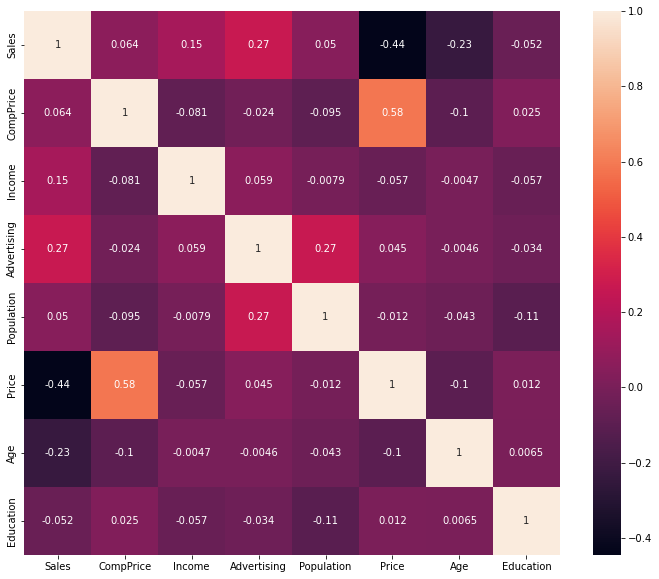

In [20]:
#Plot heatmap to see rectangular data as a color-encoded matrix.
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

Competitor Price(Price charged by competitor at each location) & Price (Price company charges for car seats at each site) these two features are highly correlated.

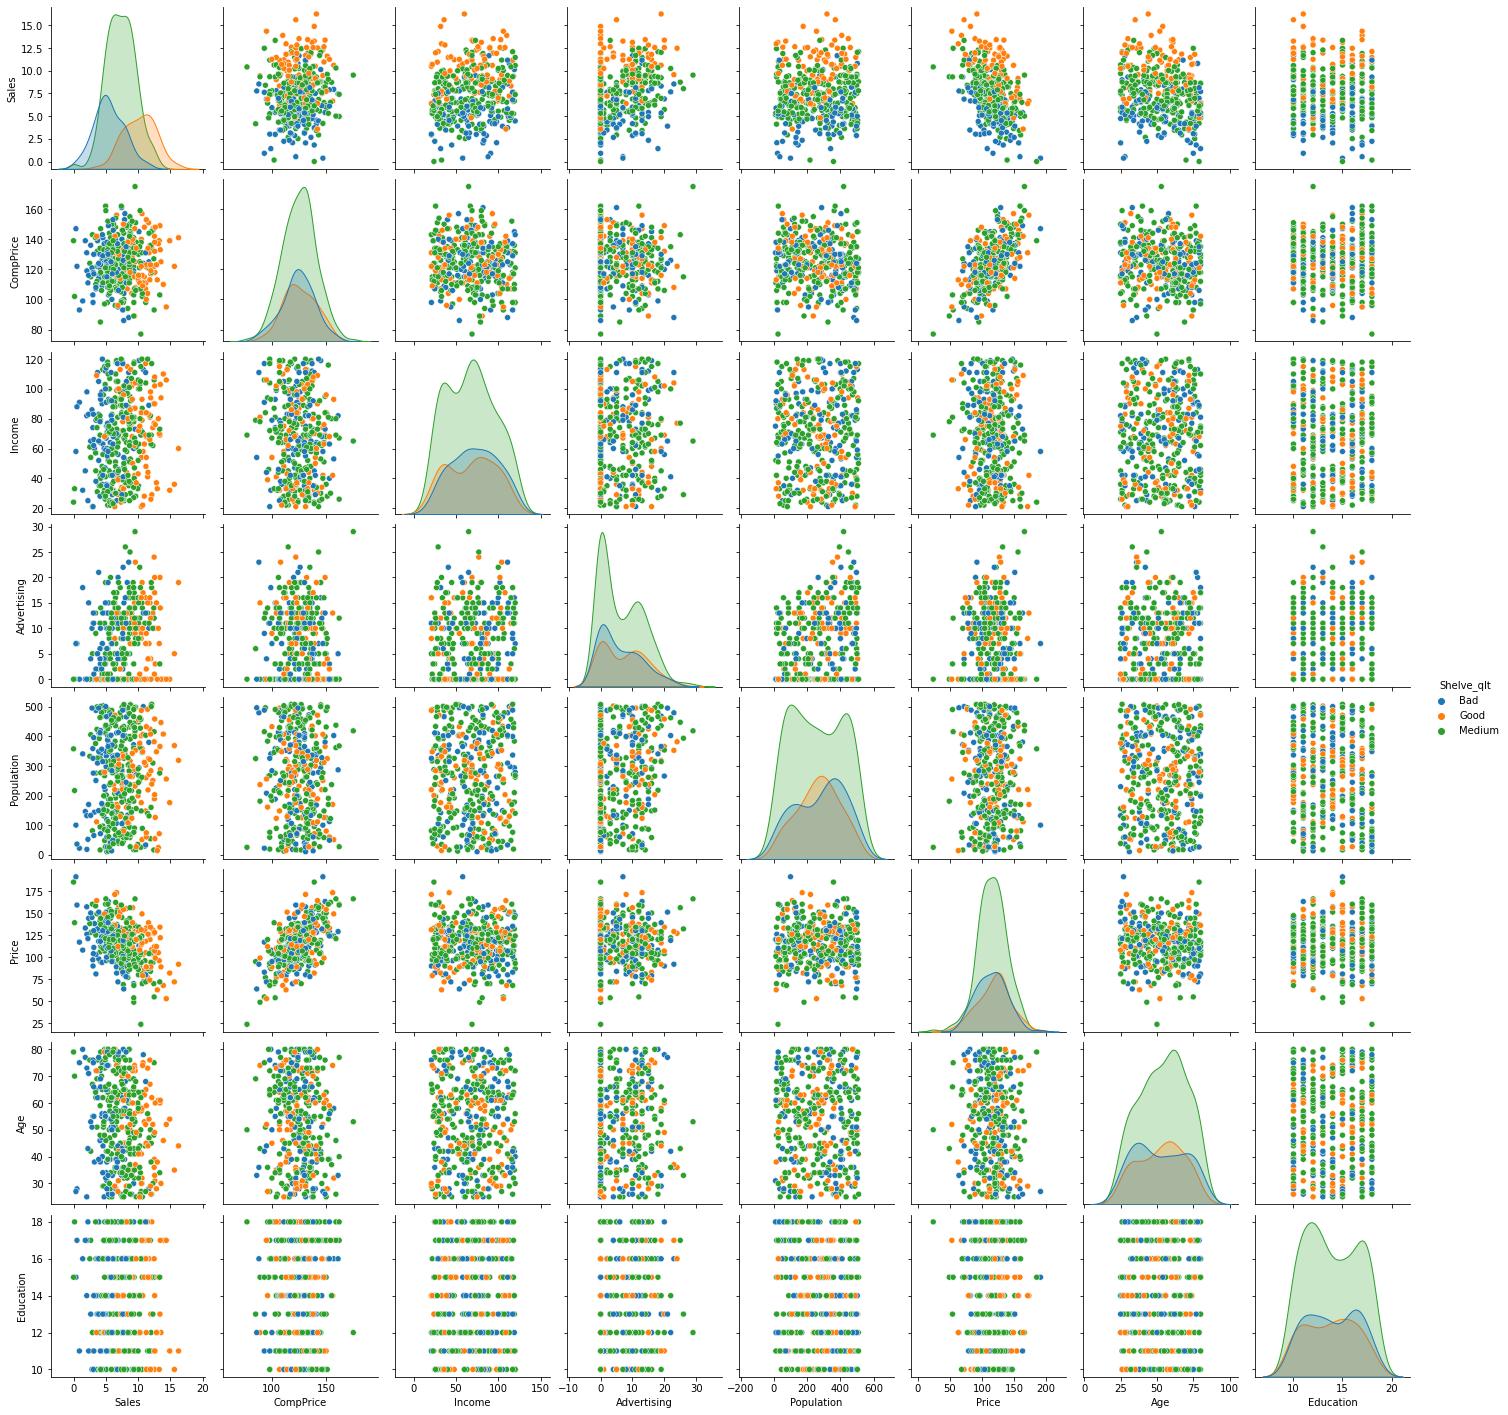

In [21]:
#plot pairplot to visualoze pairwise relationship of all the atributes at once.
sns.pairplot(data=df,hue='Shelve_qlt')

In pairplot A factor with Blue dots are Bad,with Orange dots are Good and with Medium dots are indicating the quality of the shelving location for the car seats at each site

<AxesSubplot:>

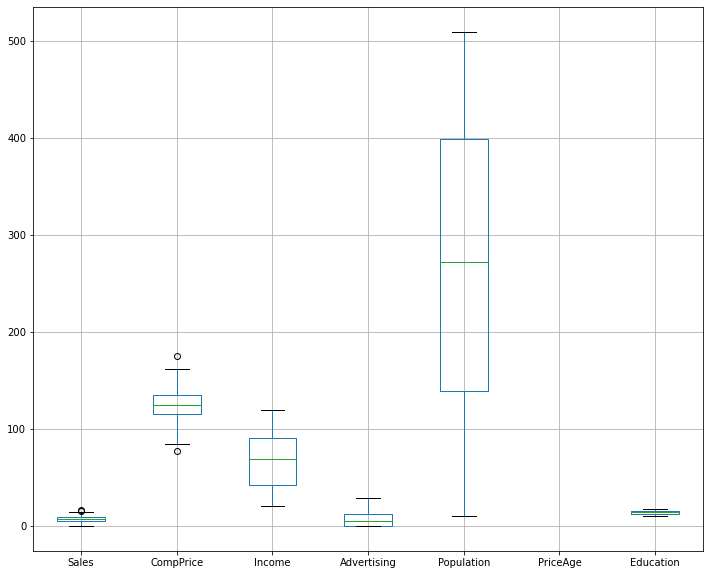

In [27]:
#plot boxplot to visualize distribution of all the numerical columnns at once..
plt.figure(figsize=(12,10))
pd.DataFrame(data=df,columns=['Sales','CompPrice','Income','Advertising','Population','Price''Age','Education']).boxplot()

The distribution of segment population is widely distributed over all other segments.

### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 


### visualize categorical columns with sales  at each location.

### 1.sales vs shelve_qlt

Shelve_qlt
Bad        530.20
Good       868.19
Medium    1600.14
Name: Sales, dtype: float64

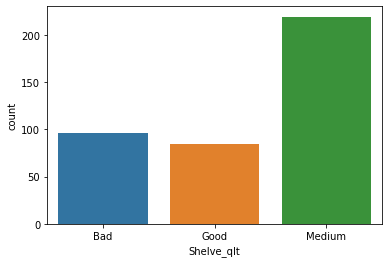

In [7]:
sns.countplot(df['Shelve_qlt'],label='sales')
x = df["Sales"].groupby(df["Shelve_qlt"])
x.sum() 

This shows The Higher Sales causes at Medium quality of the shelving location for the car seats.

### 2.Sales vs Urban

Urban
No      892.50
Yes    2106.03
Name: Sales, dtype: float64

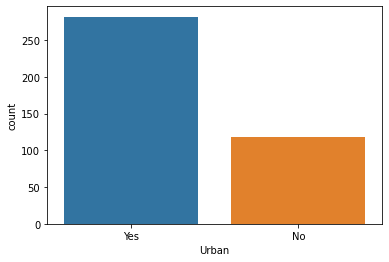

In [189]:
sns.countplot(df['Urban'],label='sales')
y = df["Sales"].groupby(df["Urban"])
y.sum() 

Urban -- A factor with levels No and Yes to indicate whether the store is in an Urban or Rural location.

From above plot we conclude that Higher Sales caused in Urban location.

### 3.Sales vs US

US
No      968.87
Yes    2029.66
Name: Sales, dtype: float64

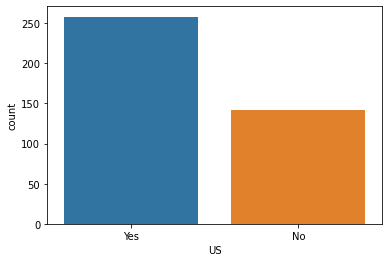

In [190]:
sns.countplot(df['US'],label='sales')
z = df["Sales"].groupby(df['US'])
z.sum() 

US -- A factor with levels No and Yes to indicate whether the store is in the US or not.

From above plot we conclude that Higher Sales caused in US.

In [8]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)
df
# drop_first : bool, default False
# Whether to get k-1 dummies out of k categorical levels by removing the first level.

,Sales,CompPrice,Income,Advertising,Population,Price,Shelve_qlt,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [9]:
#we apply .map function on target to convert categorical data into Numbers.
df['Shelve_qlt']=df['Shelve_qlt'].map({'Good':1,'Medium':2,'Bad':3})
df

,Sales,CompPrice,Income,Advertising,Population,Price,Shelve_qlt,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


In [12]:
#Devide the data into Features & Target
X=df.iloc[:,[0,1,2,3,4,5,7,8,9,10]]
Y=df['Shelve_qlt']

In [87]:
X.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0


In [13]:
Y.head()

0    3
1    1
2    2
3    2
4    3
Name: Shelve_qlt, dtype: int64

In [89]:
#check unique values in the target
df['Shelve_qlt'].unique()

array([3, 1, 2], dtype=int64)

In [90]:
#Return a Series containing counts of unique rows in the Target.
df['Shelve_qlt'].value_counts()

2    219
3     96
1     85
Name: Shelve_qlt, dtype: int64

In [92]:
colnames=list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Shelve_qlt',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [96]:
# Spliting data into train & test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)


# Building Decision Tree Classifier using Entropy Criteria

In [99]:
#set max_depth=none
dec_model=DecisionTreeClassifier(criterion='entropy',max_depth=None)
dec_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

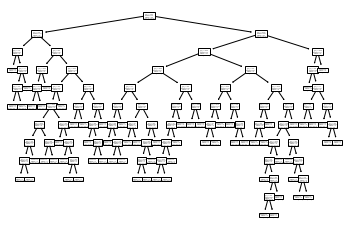

In [105]:
tree.plot_tree(dec_model)
plt.show()

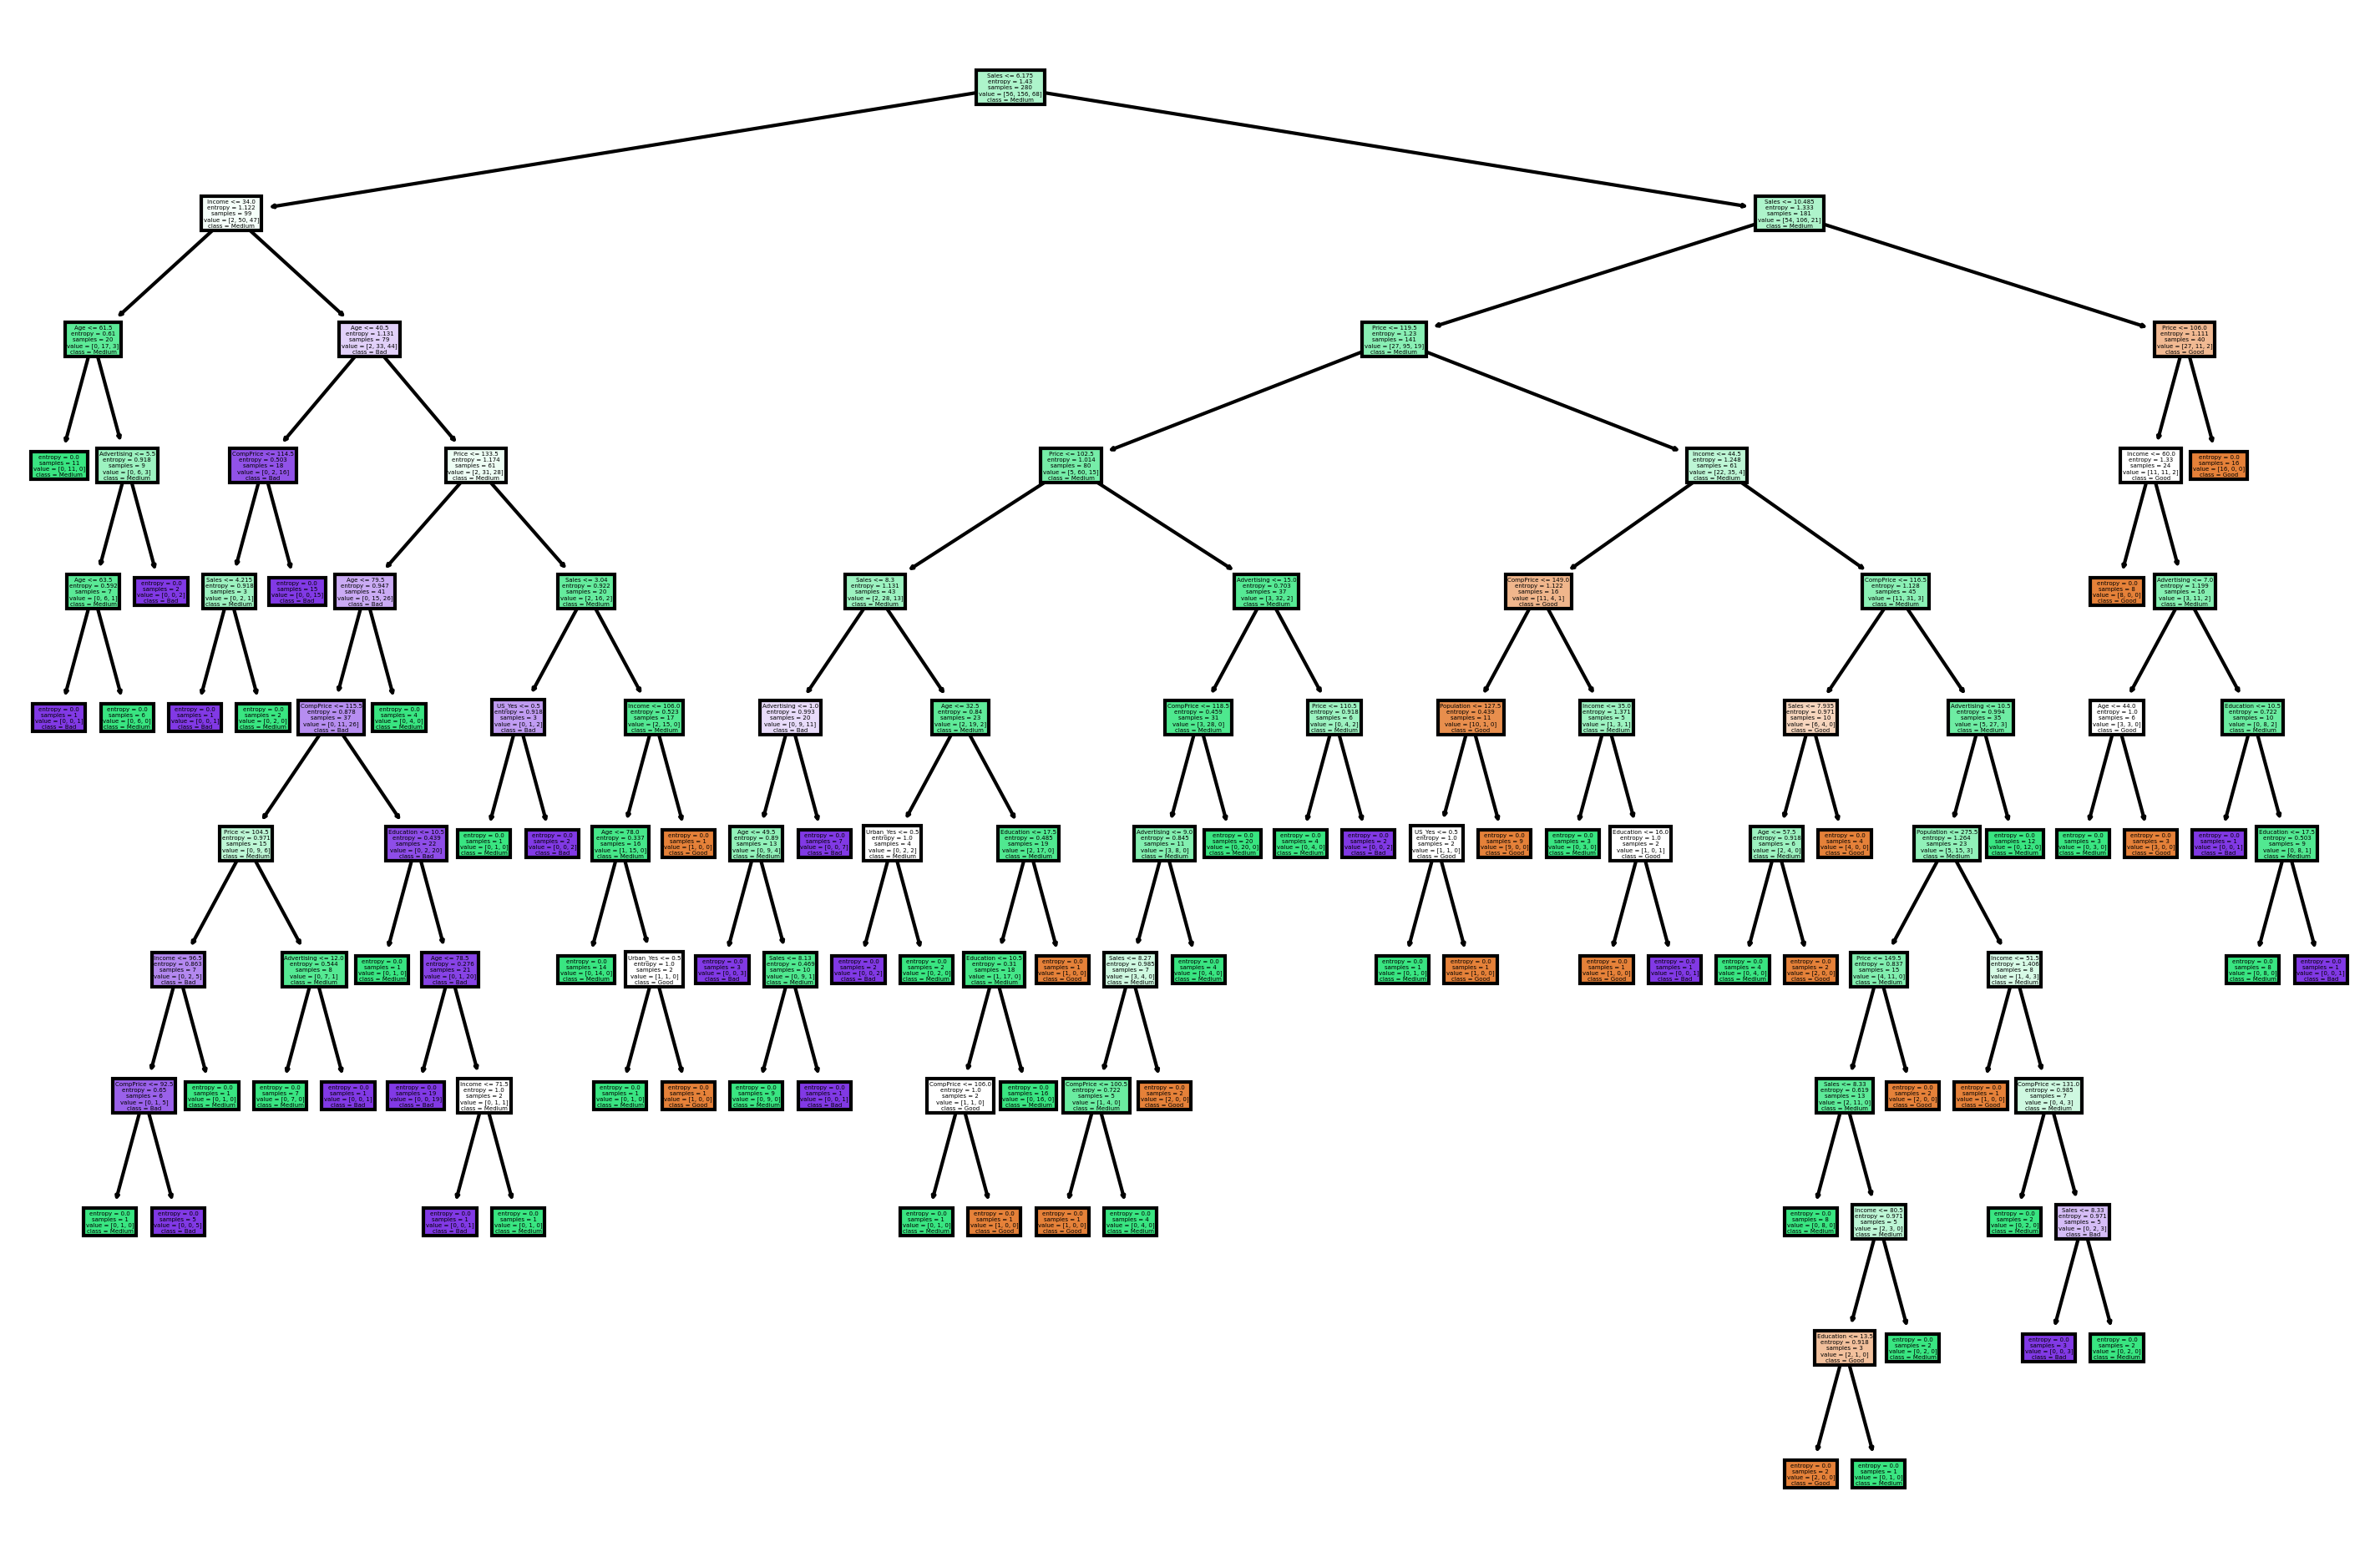

In [107]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban_Yes','US_Yes'] # give feature names
cn=['Good', 'Medium', 'Bad'] # make list of category (class) names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,8), dpi=300) # increase size using plt.subplot
tree.plot_tree(dec_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [109]:
#Predicting on test data
preds = dec_model.predict(X_test) # predicting on test data set 
pd.Series.value_counts(preds) # getting the count of each category 

2    67
3    28
1    25
dtype: int64

In [110]:
preds

array([3, 3, 1, 3, 2, 2, 1, 2, 2, 1, 3, 2, 1, 3, 2, 1, 2, 1, 2, 3, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2,
       1, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 3, 2,
       3, 2, 2, 2, 3, 1, 1, 1, 3, 2, 3, 2, 3, 2, 2, 1, 3, 1, 2, 2, 2, 2,
       3, 2, 2, 3, 2, 2, 2, 1, 1, 1], dtype=int64)

In [112]:
#getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(Y_test,preds)

col_0,1,2,3
Shelve_qlt,,,
1,15,14,0
2,8,40,15
3,2,13,13


In [114]:
#check training accuracy
dec_model.score(X_train,Y_train) 
#.score() func not need to pass predict...it automatically predict and compare with actual values....and give me accuracy.


1.0

 Decision tree depth is max so model is trained completely so it gives 100% accuracy.
 
 But 100% accuracy means model is overfitted.....we need to Performing Pruning to overcome the problem of overfitting.

In [117]:
#check testing accuracy
dec_model.score(X_test,Y_test)

0.5666666666666667

Our model is performing well on training set but performing worst on testing data that means our model is overfitted and memorized.

Model should be generalized not memorized.To avoid overfitiing we need to Performing Pruning to overcome the problem of overfitting.

## Performing Pruning to overcome the problem of overfitting:-

### calculating for max_depth=3


In [128]:
#set max_depth=3
dec_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dec_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

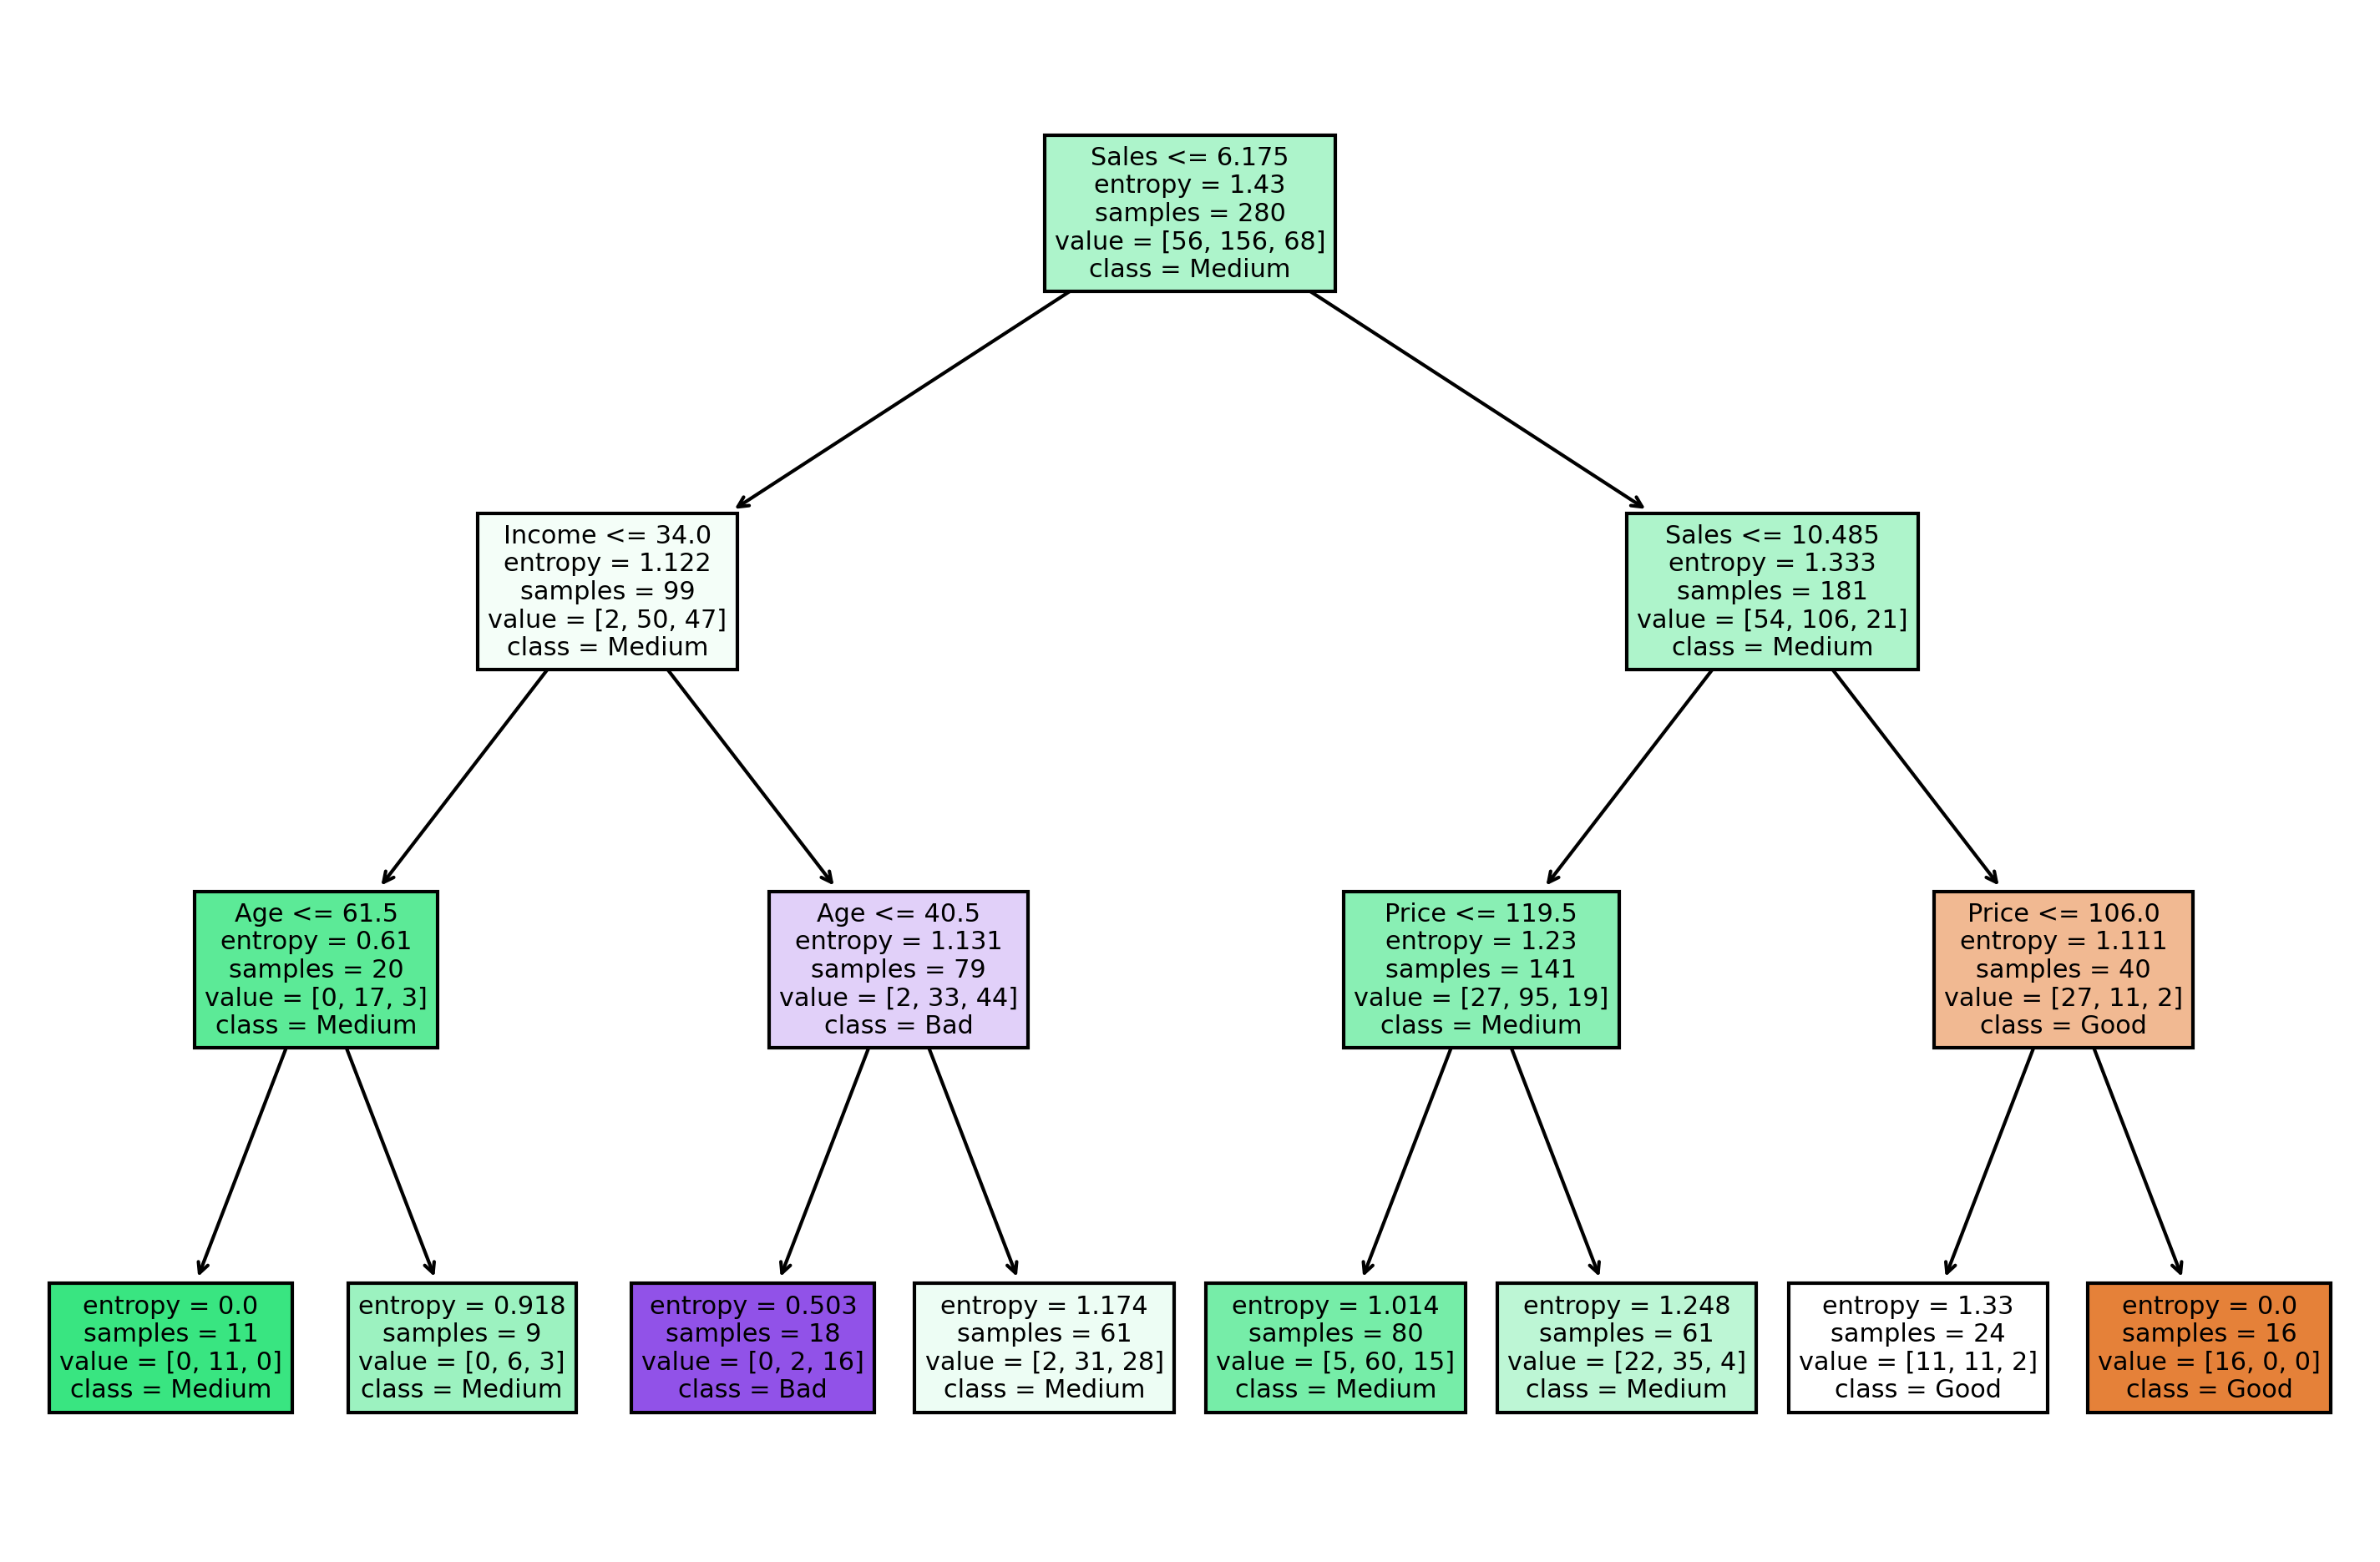

In [121]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban_Yes','US_Yes'] # give feature names
cn=['Good', 'Medium', 'Bad'] # make list of category (class) names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,8), dpi=300) # increase size using plt.subplot
tree.plot_tree(dec_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [129]:
#check training accuracy
dec_model.score(X_train,Y_train) 

0.6642857142857143

By tree pruning we reduced our models training,to make model generalize & to give better accuracy on test data.

In [131]:
#check testining accuracy
dec_model.score(X_test,Y_test)

0.6333333333333333

Now our model give 63% accuracy on test data which is better than previous model.

# Building Decision Tree Classifier (CART) using Gini Criteria

In [176]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

In [177]:
# Check training accuracy
model_gini.score(X_train, Y_train) 

0.7214285714285714

In [178]:
#Check testing accuracy
model_gini.score(X_test, Y_test) 

0.6

Using Gini Criterion we got 60% accuracy.